#**06-1 군집알고리즘**
 - 비지도학습 : 타깃이 없을때 사용
 


In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

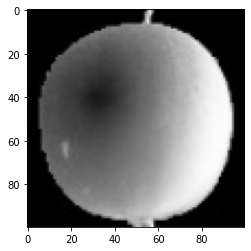

In [53]:
import numpy as np
import matplotlib.pyplot as plt
fruits = np.load('fruits_300.npy')

fruits.shape # (300,100,100)

plt.imshow(fruits[0], cmap='gray')
plt.show()


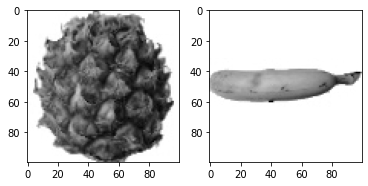

In [54]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100],cmap='gray_r')
axs[1].imshow(fruits[200],cmap='gray_r')
plt.show()

In [ ]:
apple = fruits[0:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)
apple.shape #(100,10000)

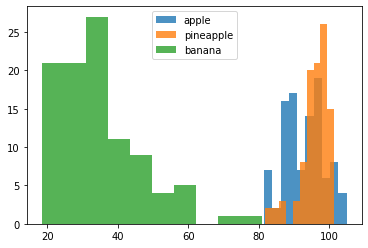

In [56]:
plt.hist(np.mean(apple,axis=1),alpha=0.8)
plt.hist(np.mean(pineapple,axis=1),alpha=0.8)
plt.hist(np.mean(banana,axis=1),alpha=0.8)

plt.legend(['apple','pineapple','banana'])
plt.show()

<BarContainer object of 10000 artists>

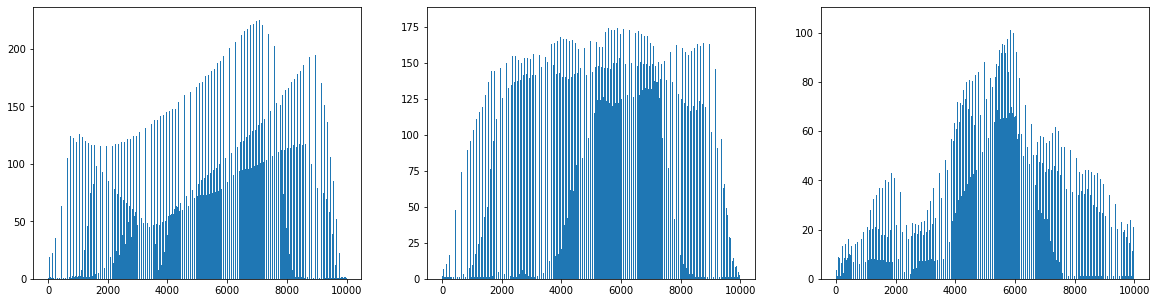

In [57]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000),np.mean(apple,axis=0))
axs[1].bar(range(10000), np.mean(pineapple,axis=0) )
axs[2].bar(range(10000), np.mean(banana,axis=0))

- 사과 - 아래쪽으로 갈 수록 높이가 낮아짐
- 파인애플 - 비교적 고르면서 높음
- 바나나 - 중앙의 픽셀값이 높음

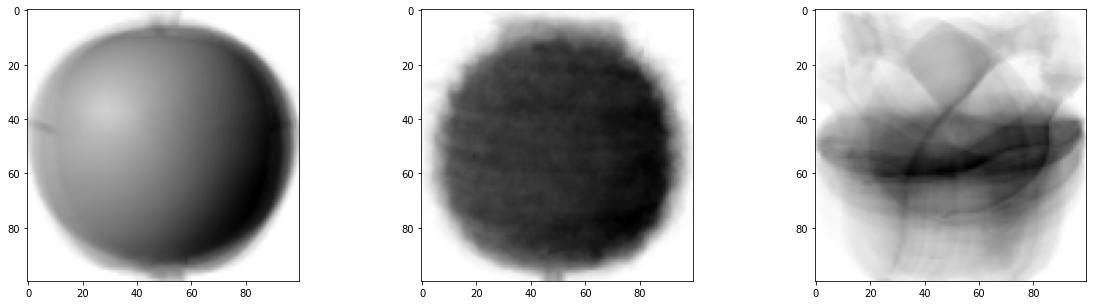

In [58]:
apple_mean = np.mean(apple, axis = 0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis = 0).reshape(100,100)
banana_mean = np.mean(banana, axis = 0).reshape(100,100)

fig ,axs = plt.subplots(1,3,figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

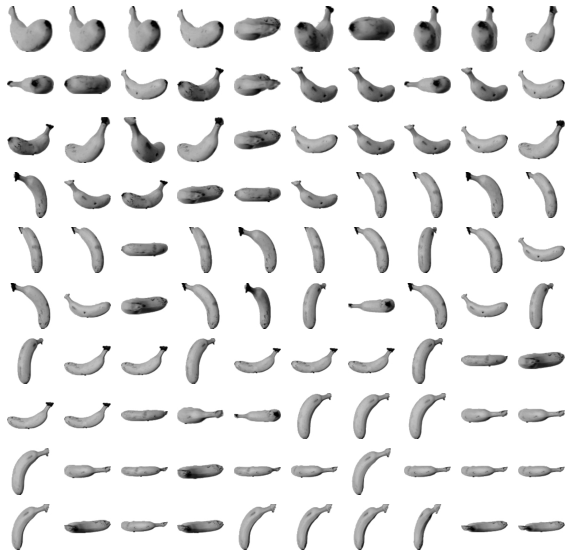

In [59]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff,axis = (1,2))
abs_mean.shape #(300,)

apple_index = np.argsort(abs_mean)

apple_index = np.argsort(abs_mean)[200:300]
fig , axs = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow( fruits[apple_index[i*10 + j] ],cmap='gray_r')
    axs[i,j].axis('off')
plt.show()

# **06-2 k-평균**


In [ ]:
!wget https://bit.ly/fruits_300_data -O fruit_300.npy

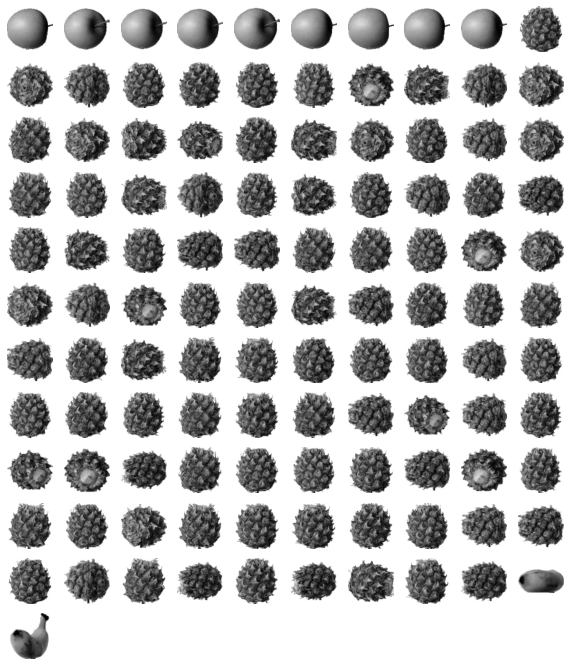

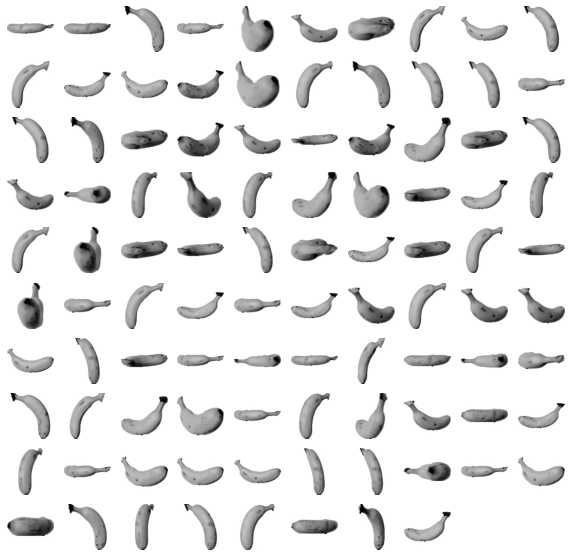

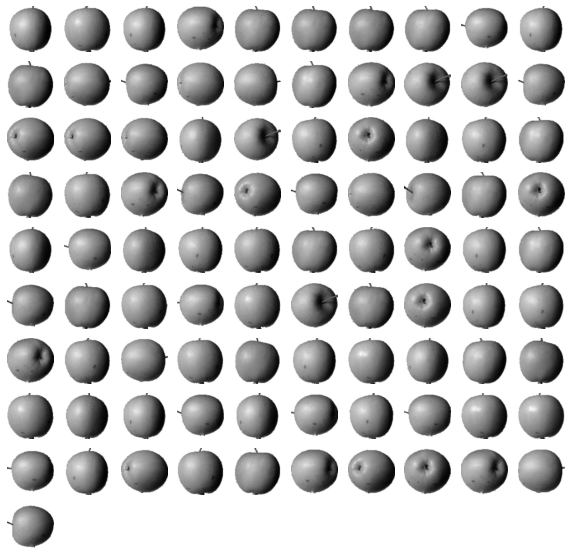

In [71]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,random_state =42)
km.fit(fruits_2d)
km.labels_ # 2,2,2,2,0,0,0,1,1,1이런식 
np.unique(km.labels_,return_counts=True) # (array([0, 1, 2], dtype=int32), array([111,  98,  91]))

import matplotlib.pyplot as plt
def draw_fruits(arr,ratio=1):
  n=len(arr)
  rows = int(np.ceil(n/10)) #행이 1개면 열의 개수는 샘플의 개수,  그렇지 않으면 10개
  cols = n if rows < 2 else 10
  fig,axs = plt.subplots(rows,cols , figsize = (cols*ratio,rows*ratio),squeeze =False)

  for i in range(rows):
    for j in range(cols):
      if i*10+j < n:
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

draw_fruits(fruits[km.labels_==0]) #사과 9개 바나나 2개 꼽사리
draw_fruits(fruits[km.labels_==1])
draw_fruits(fruits[km.labels_==2])

[[3393.8136117  8837.37750892 5267.70439881]]
[0]


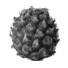

4

In [62]:
print(km.transform(fruits_2d[100:101])) #하나의 샘플 전달 -> [[3393.8136117  8837.37750892 5267.70439881]] 가장작은게 레이블 0 -> 레이블 0에 속하겠구나
print(km.predict(fruits_2d[100:101])) # [0] -> 레이블 0에 속하는 것입니다
draw_fruits(fruits[100:101]) # 파인애플그림
km.n_iter_ # 최적의 클러스터 찾기 위해 반복한 횟수 4번


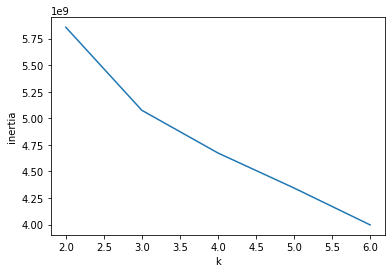

In [63]:
inertia =[]
for k in range(2,7):
  km = KMeans(n_clusters=k,random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2,7),inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

#**06-3 주성분분석**


사진 10,000개의 픽셀  → 10,000개의 특징(차원) 

ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤ→ 성능 높아지면 모델의 성능 높아지고 훈련데이터에 쉽게 **과대적합**
                        

**차원축소** - 일부 특성을 선택하여 데이터의 크기를 줄이고 지도학습 모델의 성능 향상

**주성분분석(PCA)** - 대표적인 차원축소 알고리즘

<img src="https://machine-learning-tutorial-abi.readthedocs.io/en/latest/_images/pca4.png">

**2차원 데이터 예시**

1) 가장 분산이 큰 방향

2) 벡터에 수직이고 가장 분산이 큰 방향

In [64]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

--2023-01-16 05:15:00--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-01-16 05:15:00--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-01-16 05:15:00--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)
pca.components_.shape  #(50,10000)

(50, 10000)

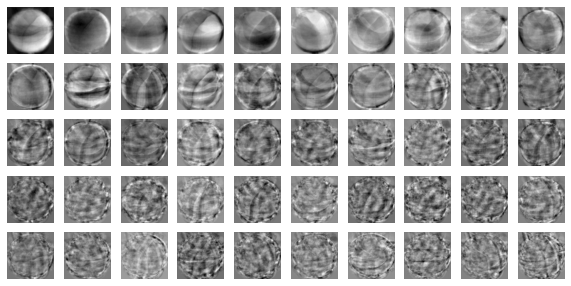

In [66]:
draw_fruits(pca.components_.reshape(-1,100,100)) #분산이 큰 방향을 순서대로 나타내기

In [ ]:
fruits_pca = pca.transform(fruits_2d) #(300,10000) --> (300,50)으로 변환
fruits_pca.shape #(300,50)

fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape #(300,10000)

fruits_reconstruct = fruits_inverse.reshape(-1,100,100)  #과일 복원하기
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

**설명된 분산** - 주성분이 원본데이터의 분산을 얼마나 잘 나타내는지 기록한 값

PCA클래스 ⇒ **explained_variance_ratio_**에 저장

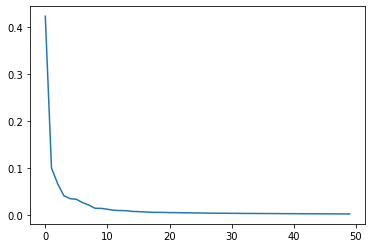

In [68]:
np.sum(pca.explained_variance_ratio_) #0.9215285240886056

plt.plot(pca.explained_variance_ratio_)
plt.show() #처음 10개의 주성분이 대부분의 분산을 표현하고 있구나

In [69]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

target = np.array([0]*100 + [1]*100 + [2]*100)

from sklearn.model_selection import cross_validate

scores = cross_validate(lr,fruits_2d,target)
np.mean(scores['test_score']) #0.9966666666666667
np.mean(scores['fit_time']) #2.8332083225250244

scores = cross_validate(lr, fruits_pca, target)
np.mean(scores['test_score']) #1.0
np.mean(scores['fit_time']) #0.037349891662597653

0.04463691711425781

In [ ]:
pca = PCA(n_components=0.5)
#주성분의 개수 지정 + 원하는 설명된 분산의 비율 입력 가능
#주성분 개수대신 0~1사이 비율을 실수로 입력
pca.fit(fruits_2d)
pca.n_components_ #2 - 특성 2개만있어도 원본 데이터에 있는 분산의 50%를 표현할 수 있다.

fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape #(300,2)

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score'])) # 0.99 
print(np.mean(scores['fit_time'])) #0.051319551467895505 - 시간 엄청 단축됨

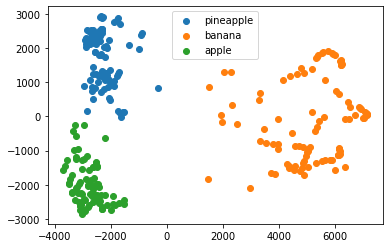

In [87]:
#차원축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾아보자
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts=True)  #(array([0, 1, 2], dtype=int32), array([110,  99,  91])) #원본데이터를 사용했을 때와 거의 비슷한 결과

#이미지 출력해보자
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label]) 
  print('\n')

#fruits_pca 데이터를 2차원으로 표현해보자
for label in range(0,3):
  data = fruits_pca[km.labels_==label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple','banana','apple'])
plt.show()